# Coauthors sequence in Astrophysics

In [10]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')
root = os.getenv('ROOT')

os.chdir(root)
os.getcwd()

'/disks/qnap3/users/23-miura/coauth-interest'

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random

from scipy.stats import expon
from scipy.stats import pareto
import source.package.util as util

In [12]:
authors_valid_As = pd.read_pickle(result_path+"authors_valid_As.pickle")
num_coauth = authors_valid_As.groupby("eid")["authid"].nunique()
num_coauth.head()

eid
117    2
140    7
172    3
181    2
207    9
Name: authid, dtype: int64

In [15]:
num_coauth = pd.merge(num_coauth,year_df,on="eid",how="left")
num_coauth.head()

,authid,year
eid,,
117,2,1997
140,7,1993
172,3,1997
181,2,1998
207,9,1995


In [17]:
num_coauth = num_coauth.sort_values(by="year")
m_seq = num_coauth["authid"].values
m_seq[:3]

array([4, 2, 4])

In [18]:
m_seq = m_seq[m_seq>1]

In [19]:
import random 
m_seq_sample = random.sample(population=list(m_seq),k=30552)

In [20]:
import itertools
# Guimera 2006
p=0.76
q=0.82
m=3

C_HIS = {0:{1,2},1:{0,2},2:{0,1}}
priority = np.array([[random.random() for i in range(3)] for j in range(3)])
for i in range(3):
  priority[i][i] = 0
# priority, priority[1].argmax()

INC = {0,1,2}
coauth = []
# year = []

def step(m, priority):
  max_id = len(INC)
  id = set()
  inc_his = [] # team of previously selected agent
  
  while len(id)<m:
    # incumbents
    if random.random()<p:
      if random.random()<q and len(inc_his)!=0:
            # # print("incumbents repeat")
          # print(id)
        choice = priority[list(id)[-1]].argmax()
        # choice = random.choice(list(inc_his))
      else:
      # print("incumbents")
        choice = random.choice(list(INC))
      # print(choice)
      id.add(choice)
      inc_his = C_HIS[choice]
    # newcomer
    else:
    # print("newcomer")
      inc_his = []
      id.add(max_id)# ID of the newcomer
      priority = np.vstack([priority, np.zeros((1, priority.shape[1]))])
      priority = np.hstack([priority, np.zeros((priority.shape[0], 1))])
    # print(priority)
      max_id += 1
  
  for i in id:
    if C_HIS.get(i)!=None:
      C_HIS[i].update(id - {i})
    else:
      C_HIS.update([(i,id - {i})])
  INC.update(id)
  return id, priority

for i in range(len(m_seq_sample[:1000])):
    # print("m is ",m_seq_sample[i])
  
  id, priority = step(m_seq_sample[i], priority)
  coauth.append(id)
# print("id is ",id)

  combinations = list(itertools.combinations(id, 2))
  for c in combinations:
    priority[c[0]][c[1]] = random.random()
    priority[c[1]][c[0]] = random.random()
  # print(priority)
  # print("----")
  # index = counts[counts<(i/len(m_seq_sample))].index
  # if len(index)>0:
  #   year.append(index[0])
  # else:
  #   year.append(1969)

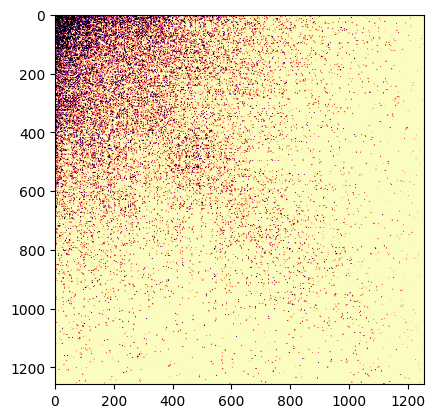

In [21]:
order = np.argsort(priority.sum(axis=0))
clustered_priority = priority[order[::-1], :][:, order[::-1]]

plt.imshow(clustered_priority,vmax=0.1, cmap="magma_r")
# plt.imshow(clustered_priority)

(array([ 154.,  159.,  163.,  198.,  213.,  215.,  215.,  223.,  236.,
         250.,  254.,  266.,  282.,  292.,  308.,  314.,  308.,  311.,
         320.,  339.,  358.,  360.,  360.,  380.,  395.,  407.,  461.,
         472.,  479.,  481.,  507.,  550.,  577.,  609.,  654.,  747.,
         786.,  825.,  865.,  912.,  959., 1022., 1074., 1124., 1139.,
        1144., 1182., 1220., 1270., 1331., 1384., 1498.]),
 array([1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976., 1977.,
        1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985., 1986.,
        1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994., 1995.,
        1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003., 2004.,
        2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012., 2013.,
        2014., 2015., 2016., 2017., 2018., 2019., 2020., 2021.]),
 <BarContainer object of 52 artists>)

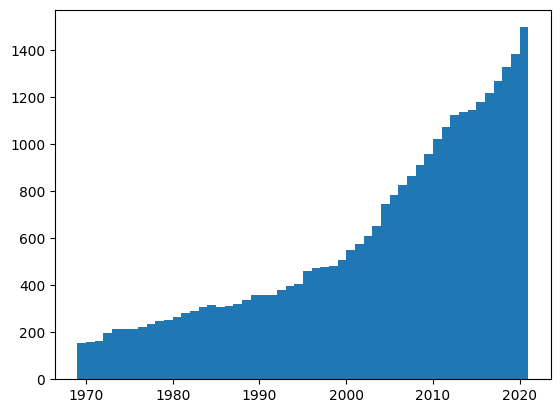

In [14]:
# year[-1]
# len(set(year))
# plt.hist(year,bins=[i for i in range(1969,2022)])

In [77]:
temp = pd.DataFrame(coauth).rename_axis("eid")

def combine_columns(row):
    return row.values.tolist()

# author_df = temp.iterrows.values.tolist()
author_df = pd.DataFrame(temp.apply(combine_columns, axis=1).rename("authid"))
# author_df = author_df.assign(year=[i//(len(m_seq_sample)//50) for i in range(len(m_seq_sample))])
author_df = author_df.assign(year=[i//(5000//50) for i in range(5000)])
author_df

,authid,year
eid,,
0,"[0.0, 1.0, 2.0, 3.0, nan, nan, nan, nan, nan, ...",0
1,"[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, nan, ...",0
2,"[0.0, 3.0, 5.0, 7.0, nan, nan, nan, nan, nan, ...",0
3,"[8.0, 0.0, 4.0, 9.0, nan, nan, nan, nan, nan, ...",0
4,"[0.0, 3.0, 5.0, nan, nan, nan, nan, nan, nan, ...",0
...,...,...
4995,"[5258.0, 389.0, nan, nan, nan, nan, nan, nan, ...",49
4996,"[2609.0, 6063.0, nan, nan, nan, nan, nan, nan,...",49
4997,"[6050.0, 6051.0, nan, nan, nan, nan, nan, nan,...",49


In [81]:
from source.package.util import plotter

authors_valid = author_df.explode("authid").dropna().reset_index()
authors_valid
# coauthorship_count = authors_valid[['eid', 'authid']].groupby(by='authid').count()
# big_author = coauthorship_count.rename({"eid":"n_papers"},axis=1)
# big_author
# # plotter(big_author["n_papers"], count="number")

,eid,authid,year
0,0,0.0,0
1,0,1.0,0
2,0,2.0,0
3,0,3.0,0
4,1,0.0,0
...,...,...,...
21417,4997,6051.0,49
21418,4998,6668.0,49
21419,4998,6669.0,49
21420,4999,304.0,49


In [82]:
# def coauthor_works(id):
#     works = authors_valid["eid"][authors_valid['authid']==id]
    
#     coauthors = authors_valid[authors_valid['eid'].isin(works)].query(f"authid!={id}")
#     df_seqyear_multi = coauthors.groupby(by='authid', group_keys=True).filter(lambda x: len(x) > 1)
#     if len(df_seqyear_multi)<1: return None
#     df_seqyear_delta = df_seqyear_multi.groupby(by='authid', group_keys=True)['year'] \
#     .apply(lambda x: x - x.shift(1)) \
#     .dropna().reset_index().rename(columns={"level_1":"index"})
    
#     df_seqyear_delta["source_authid"] = id
#     df_seqyear_delta = df_seqyear_delta.merge(coauthors["eid"], left_on="index", right_index=True, how="left")
#     df_seqyear_delta["previous_work"] = df_seqyear_delta.groupby("authid").shift(1)["eid"]
  
#     df_seqyear_delta = df_seqyear_delta.dropna()
#     return df_seqyear_delta

def calculate_coauth_intervals(id,authors_valid,year_df):
    works = authors_valid['eid'][authors_valid['authid']==id]
    # works = works.sample(frac=0.5)
    if works.shape[0]<3: return None
    
    selected_papers = year_df[year_df.index.isin(works.values)]
    # print(selected_papers)
    np.random.shuffle(selected_papers.values)# null-year
    selected_papers = selected_papers.sort_values(by='year')
    # print(selected_papers)
    selected_papers = selected_papers.assign(seq=list(range(0,len(selected_papers))))
    coauthors = authors_valid[authors_valid['eid'].isin(works)].query(f"authid!={id}")
    
    df_seqyear = pd.merge(coauthors,selected_papers, how='left', on='eid').sort_values(by='seq')
    df_seqyear_multi = df_seqyear.groupby(by='authid', group_keys=True).filter(lambda x: len(x) > 1)
    if len(df_seqyear_multi) < 3: return None
    df_seqyear_delta = df_seqyear_multi.groupby(by='authid', group_keys=True)[['year','seq']] \
    .apply(lambda x:  x - x.shift(1)) \
    .dropna().astype(int).reset_index()
    
    df_seqyear_delta = pd.merge(df_seqyear_delta, df_seqyear["eid"], how="left", left_on="level_1", right_index=True).drop(columns=["level_1"])
    df_seqyear_delta["source_authid"] = id
    df_seqyear_delta["previous_work"] = df_seqyear_delta.groupby("authid").shift(1)["eid"]

    df_seqyear_delta = df_seqyear_delta.dropna()
    return df_seqyear_delta


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


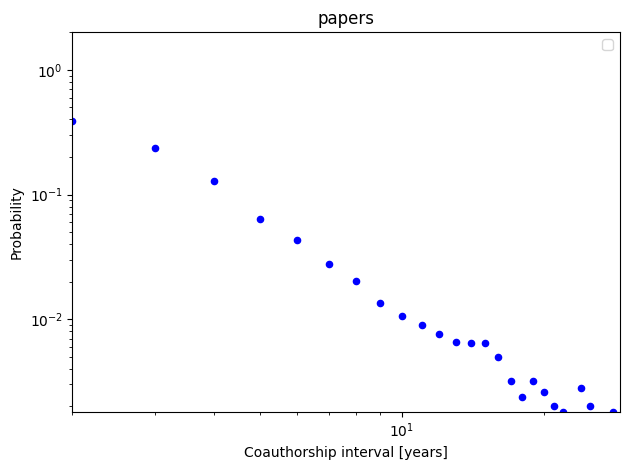

(array([375., 516., 383., 440., 473., 407., 363., 393., 398., 400., 462.,
        434., 420., 427., 423., 439., 440., 415., 436., 425., 491., 443.,
        390., 398., 452., 451., 483., 450., 460., 390., 430., 392., 465.,
        479., 401., 474., 401., 393., 420., 458., 429., 450., 477., 397.,
        333., 417., 411., 509., 440., 369.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
        39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.]),
 <BarContainer object of 50 artists>)

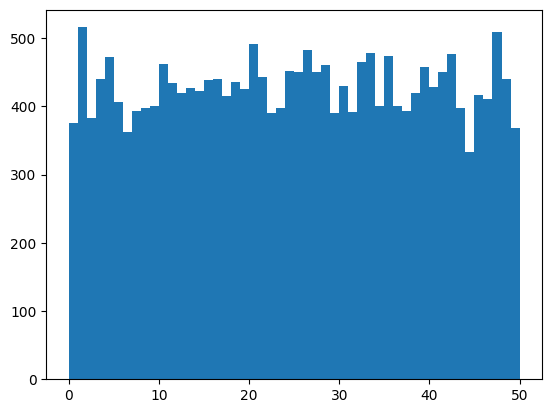

In [85]:
plotter(authors_valid.groupby("eid")["authid"].nunique(), title="papers")
plt.show()

# plt.hist(authors_valid["year"],bins=[i for i in range(1969,2022)])
plt.hist(authors_valid["year"],bins=[i for i in range(51)])

In [87]:
res = pd.DataFrame()
auth_list = [i for i in range(int(authors_valid["authid"].max()))]
auth_list = random.sample(auth_list,len(auth_list))

for i in range(5000):
  res = pd.concat([res,coauthor_works(auth_list[i])],axis="index")
res

,authid,index,year,source_authid,eid,previous_work
1,24.0,1575,1.0,149,370,251.0
2,24.0,4450,7.0,149,1068,370.0
5,53.0,12669,15.0,149,2950,1445.0
2,1016.0,21192,3.0,3904,4936,4634.0
5,516.0,9186,7.0,566,2156,1462.0
...,...,...,...,...,...,...
1,475.0,9943,6.0,1733,2331,1779.0
1,0.0,20839,1.0,1344,4861,4727.0
3,467.0,15860,7.0,895,3688,2975.0
1,253.0,9571,6.0,1855,2231,1665.0


In [88]:
res.to_pickle(result_path + "guimera_As_year_priority.pickle")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Calculating best minimal value for power law fit
4.737096689015631%
12.0
0.12090629859248575


/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:48: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left, right)
/disks/qnap3/users/23-miura/coauth-interest/source/package/util.py:49: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(bottom, top)


(2e-05, 2)

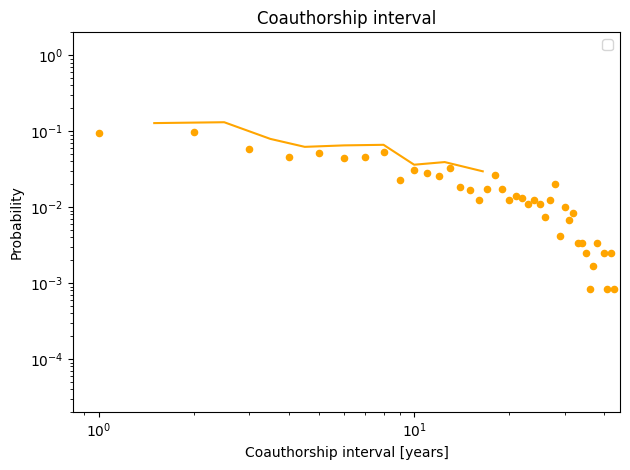

In [7]:
import powerlaw
res = pd.read_pickle(result_path + "guimera_As_year_priority.pickle")
util.plotter(res["year"],count="probability", c="orange")
data = res[(res["year"]>0)*(res["year"]<20)]["year"]
powerlaw.plot_pdf(data, c="orange")
fit = powerlaw.Fit(data, discrete=True)
print(fit.alpha)
print(fit.xmin)
print(fit.D)
plt.ylim(2*10**(-5),2)

In [90]:
import networkx as nx
import itertools

# 例のセット
pairs = []
# セット内の全てのペアを取り出す
for c in coauth:
  pairs += list(itertools.combinations(c, 2))

G = nx.Graph()

print(len(pairs))
G.add_edges_from(pairs)

# nx.draw(G, node_size=5)

74884


In [91]:
connected_components = max(nx.connected_components(G),key=len)
len(connected_components), len(G.nodes), len(connected_components)/len(G.nodes)

(6551, 6670, 0.9821589205397301)

In [159]:
coauth_history_As = pd.merge(authors_valid_As[["eid","authid"]],year_df,on="eid",how="left")
coauth_history_As.head()

,eid,authid,year
0,85015254545,57206132735,2017
1,85015254545,48861896500,2017
2,85015254545,56888819000,2017
3,85015254545,7101811799,2017
4,85015329868,7402965220,2015


In [166]:
groups = authors_valid_As[["eid","authid"]].groupby("eid")
pairs_As = []
  
for g in groups:
  pairs_As += list(itertools.combinations(g[1]["authid"].values, 2))
pairs_As[:3]

[(7005148342, 7003508994), (6701832481, 6701835921), (6701832481, 16490681300)]

In [168]:
G_As = nx.Graph()

print(len(pairs_As))
G_As.add_edges_from(pairs_As)

connected_components = max(nx.connected_components(G_As),key=len)
len(connected_components), len(G_As.nodes), len(connected_components)/len(G_As.nodes)

17851724


(559403, 610586, 0.916173970579083)

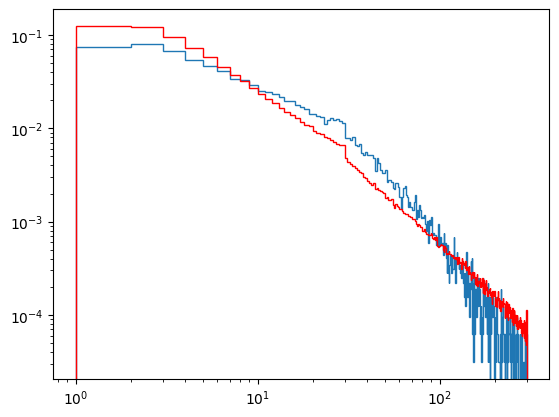

In [185]:
plt.hist([G.degree(n) for n in G.nodes()],density=True, bins=np.linspace(1,300,300),histtype="step")
plt.hist([G_As.degree(n) for n in G_As.nodes()],density=True, bins=np.linspace(1,300,300),histtype="step",color="red")

plt.yscale("log")
plt.xscale("log")